In [1]:
%pip install -r req.txt

  Using cached facenet_pytorch-2.6.0-py3-none-any.whl.metadata (12 kB)
  Using cached pillow-10.2.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached torch-2.2.2-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached torchvision-0.17.2-cp310-cp310-manylinux1_x86_64.whl.metadata (6.6 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-p

In [34]:
import matplotlib.pyplot as plt
import cv2
from facenet_pytorch import MTCNN, InceptionResnetV1 # face detector and face recognition
from PIL import Image # python imaging library

In [36]:
img_path = "images/group0.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

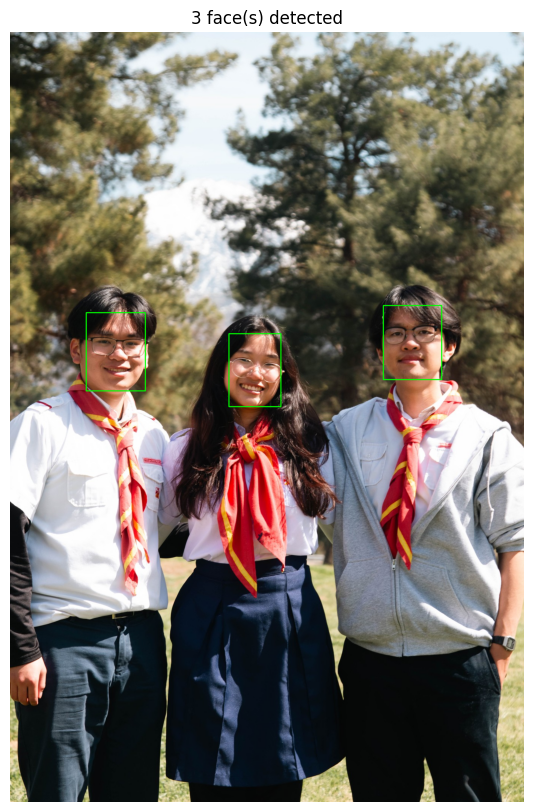

In [37]:
# Detect faces
mtcnn = MTCNN(keep_all=True)
boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)

# Draw boxes
import numpy as np
img_boxed = img.copy()

if boxes is not None:
    for box in boxes:
        x1, y1, x2, y2 = [int(b) for b in box]
        cv2.rectangle(img_boxed, (x1, y1), (x2, y2), color=(0,255,0), thickness=2)

# Visualize
plt.figure(figsize=(10, 10))
plt.imshow(img_boxed)
plt.axis('off')
plt.title(f"{len(boxes)} face(s) detected" if boxes is not None else "No faces detected")
plt.show()

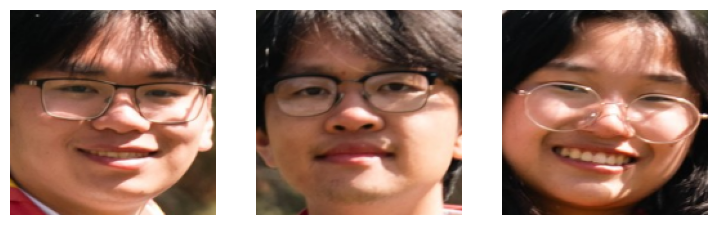

In [39]:
# Visualize
fig, axes = plt.subplots(1, len(faces), figsize=(len(faces)*3, 4))
for face, ax in zip(faces, axes):
    ax.imshow(face.permute(1, 2, 0).int().numpy())
    ax.axis('off')
plt.show()